In [10]:
import gensim
from gensim import corpora

from pythainlp.tokenize import word_tokenize

import seaborn as sns

import pandas
import numpy

import math
import re

In [11]:
def clean(doc):
    while True:
        new_doc = re.sub('[^\u0E00-\u0E7F]+', '', doc)
        if doc == new_doc:
            break
        else:
            doc = new_doc

    return doc

def remove_stop_words (corpus, dictionary, threshold):
    TfidfModel = gensim.models.TfidfModel
    tfidf = TfidfModel(corpus, dictionary)

    stop_words = []
    for doc in corpus:
        stop_words += [id for id, value in tfidf[doc] if value < threshold]

    dictionary.filter_tokens(bad_ids=stop_words)
    return dictionary

def load_corpus(file_directory):
    comments = []

    with open(file_directory, 'r') as f:
        start = False
        num = -2

        for line in f:
            if line.startswith('comment'):
                num += 1
                if num < 0:
                    continue

                comment = ''.join(x for x in line.split(':')[2:])
                comments.insert(num, comment)
                start = True

            elif start:
                comments[num] += line
        
    return comments
                
def get_tokenized_corpus(corpus):
    tokenized_corpus = []
    
    for num in range(len(corpus)):
        tokenized_corpus.insert(num, clean(corpus[num]))
        tokenized_corpus[num] = word_tokenize(tokenized_corpus[num], engine='icu')
        
    return tokenized_corpus

In [12]:
corpus = load_corpus('../data/facebook/1/ผู้บริโภค - TrueCoffee.txt')
tokenized_corpus = get_tokenized_corpus(corpus)
print('Total documents ' + str(len(tokenized_corpus)))

dictionary = corpora.Dictionary(tokenized_corpus)
bad_words = [id for id in range(len(dictionary)) if len(dictionary[id]) == 1]        
dictionary.filter_tokens(bad_ids=bad_words)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

dictionary = remove_stop_words(bow_corpus, dictionary, 0.03)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

Total documents 350


In [13]:
for i, doc in enumerate(bow_corpus):
    print(str(i) + ': ', end='')
    for id, value in doc:
        print('(' + dictionary[id] + ', ' + str(value) + ')', end=' ')
    print('')

0: (กาแฟ, 1) (ก่อน, 1) (ค่ะ, 1) (จน, 1) (ชง, 1) (บอก, 1) (พนง, 1) (มาก, 1) (ร้าน, 2) (ว่า, 1) (สวย, 2) (ส่ง, 1) (อยาก, 1) (เงิน, 1) (เถอะ, 1) (เรียน, 1) (เอา, 1) (แต่ง, 1) (ไป, 1) 
1: (ส่ง, 1) (ควร, 1) (ค้า, 1) (จาก, 1) (ถ้า, 1) (ทรู, 1) (มัน, 1) (มา, 1) (มูฟ, 1) (ลูก, 1) (สิทธิ์, 1) (เต็ม, 1) (เรา, 1) (แล้ว, 1) (โปร, 1) (ใจ, 1) (ให้, 1) (ไม่, 1) 
2: (มาก, 1) (ไม่, 1) (ครับ, 2) (คุ้ม, 1) (ช่วง, 1) (ช่วย, 1) (ช้า, 1) (ด้วย, 1) (นี้, 1) (ปรับปรุง, 1) (ราย, 1) (เดือน, 1) (เนต, 1) (เลย, 1) (แต่, 1) (แพง, 1) (ใช้, 1) 
3: (คาส, 1) (คาเฟ่, 1) (ชา, 1) (ตาบั, 1) (ติ, 1) (รส, 1) (รา, 1) (ออ, 1) 
4: (เต็ม, 1) (แต่, 1) (ชา, 1) (กิน, 1) (ก็, 1) (ขนาด, 1) (จะ, 1) (นั้น, 1) (น้ำ, 2) (หมด, 1) (อะไร, 1) (เดียว, 1) (เปล่า, 1) (เมนู, 1) (เหลือ, 1) (แก้ว, 3) (แข็ง, 2) (แน่น, 1) (แป๊บ, 1) (ไทย, 1) 
5: (มาก, 1) (ครับ, 1) (ด้วย, 1) (ปรับปรุง, 1) (คนับ, 1) (ที, 1) (นี่, 1) (บ่อย, 1) (บ้าน, 1) (พัด, 1) (รึ, 1) (ลม, 1) (หลุด, 1) (หวย, 1) (หาย, 1) (เน็ต, 2) (โพย, 1) 
6: (กาแฟ, 1) (จน, 2) (ว่า, 1) (ถ้า, 2) (โปร, 

118: (น้ำ, 1) (แข็ง, 1) (เค็ม, 1) 
119: (ก็, 1) (ที่, 1) (น้อย, 1) (นั่ง, 1) (ราคา, 1) (ลด, 1) (หน่อย, 1) 
120: (แต่, 1) (แพง, 1) (ชา, 1) (ติ, 1) (รส, 1) (อน, 1) (เก, 1) (เอิ่มมมม, 1) 
121: (เลย, 1) (จะ, 1) (คุณ, 1) (ทุก, 1) (เมิง, 1) (อย่าง, 1) (ครอบคลุม, 1) (บ่, 1) (แม่น, 1) 
122: (ว่า, 1) (แล้ว, 1) (ไม่, 1) (ที, 1) (ผม, 1) (อร่อย, 1) (ยัง, 1) (เย็น, 1) (ลอง, 2) (เคย, 1) (ใคร, 1) (โกโก้, 1) (ยืนยัน, 1) (เค้า, 1) 
123: (มาก, 1) (เน็ต, 1) (เน่า, 1) 
124: (ออ, 1) (เป็น, 1) (ความ, 1) (ริ, 1) (จิ, 1) (นอล, 1) 
125: (กาแฟ, 1) (ไม่, 1) (ไม่มี, 1) (นะ, 1) (ลอง, 1) (ความ, 1) (ดู, 1) (ค่อย, 1) (เรื่อง, 1) (รู้, 2) (ถาม, 1) (เค้า, 1) 
126: (ไม่, 1) (ก็, 1) (มี, 1) (ที่, 1) (รสชาติ, 1) (อร่อย, 1) (ครีม, 1) (วิป, 1) (หวาน, 1) (ไอ้, 1) (ต่างๆ, 1) (ท็อป, 1) (ปิ้ง, 1) (เจี๊ยบ, 1) 
127: (ก็, 1) (ชอบ, 1) (ได้, 1) (นะ, 1) (ร้า, 1) (นอะ, 1) (ยุ่, 1) (บรรยากาศ, 1) 
128: (จืด, 1) 
129: (พนง, 1) (นท, 1) (หน้า, 1) (ขา, 1) (สา, 1) (ตูด, 1) (พระราม, 1) (รัล, 1) (เซ้, 1) 
130: (ร้าน, 1) (ไม่, 1) (เหมือน, 1) (น

327: (ร้าน, 1) (ก็, 1) (ผม, 1) (แค่, 1) (อย่า, 1) (พอ, 1) (ออก, 1) (ไล่, 1) (นอก, 1) 
328: (กาแฟ, 2) (ค่ะ, 1) (กิน, 1) (น้ำ, 1) (เปล่า, 1) (เหมือน, 1) (กลิ่น, 1) 
329: (ไม่, 1) (ตลอด, 1) (อร่อย, 1) (หวัง, 1) (เคย, 1) (ผิด, 1) 
330: (มา, 1) (คอม, 1) (เม้น, 1) (อ่าน, 1) 
331: (คน, 1) (เยอะ, 1) (จัง, 1) 
332: (รา, 1) (รสชาติ, 1) (เหมาะ, 1) (กับ, 1) (คม, 1) (ยู่, 1) (สมอ, 1) 
333: (รสชาติ, 1) 
334: (ไป, 1) (ไม่, 1) (แพง, 1) (รสชาติ, 1) (กับ, 1) (สม, 1) 
335: (ปรับปรุง, 1) (ไหน, 1) (เรื่อง, 1) 
336: (แพง, 1) 
337: (ราคา, 1) 
338: (แพง, 1) 
339: (ชอบ, 1) 
340: (ราคา, 1) 
341: (กาแฟ, 1) (มาก, 1) (กก, 7) (กกก, 1) (มึง, 1) (กาก, 1) 
342: (แพง, 1) 
343: (ราคา, 1) 
344: (ไม่, 1) (อร่อย, 1) 
345: (ทรู, 1) (เลย, 1) (ใช้, 1) (น้ำ, 1) (รสชาติ, 1) (ทุก, 1) (ยัง, 1) (เพิ่ม, 1) (แต้ม, 1) (หวัง, 1) (แลก, 1) (ผิด, 1) (ตัง, 1) (ห่วย, 1) 
346: (เลย, 1) (เมนู, 1) (รสชาติ, 1) (เห, 1) (อร่อย, 1) (ใช้ได้, 1) (ละ, 1) (หลาย, 1) 
347: (ไม่, 1) (ดืมว่ะ, 1) (หมา, 1) 
348: (กาแฟ, 1) (ร้าน, 1) (นี้, 1) (น้ำ, 1) (แข็ง,

count    350.000000
mean      11.628571
std        9.481956
min        1.000000
25%        5.000000
50%        9.000000
75%       15.000000
max       84.000000
dtype: float64

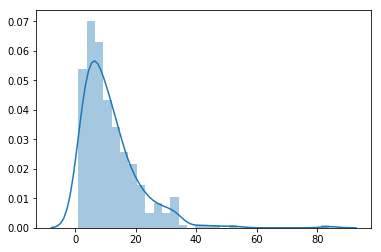

In [14]:
TfidfModel = gensim.models.TfidfModel
tfidf = TfidfModel(bow_corpus, dictionary)

x = []
weighted_vectors = []
for doc in bow_corpus:
    weighted_vectors.append(tfidf[doc])
    x.append(len(tfidf[doc]))
    
sns.distplot(x);

x = pandas.Series(x)
mean = int(math.floor(x.mean()))
x.describe()

In [15]:
for vector in weighted_vectors:
    vector.sort(key=lambda term: term[1], reverse=True)
     
weighted_vectors = [vector[:mean] for vector in weighted_vectors if len(vector) >= 11]

In [16]:
weighted_vectors[5]

[(3, 0.3693750674088048),
 (22, 0.28630045291385153),
 (93, 0.2546518626639504),
 (95, 0.2546518626639504),
 (97, 0.2546518626639504),
 (98, 0.2546518626639504),
 (101, 0.2546518626639504),
 (94, 0.2245198662797377),
 (102, 0.2245198662797377),
 (32, 0.2195933230697666),
 (103, 0.1846875337044024)]

In [ ]:
def cosin_sim(vector1, vector2):
    